# Time Series Visualizer

### Import necesary libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

## Import data

In [2]:
df = pd.read_csv('./fcc-forum-pageviews.csv')
df.set_index('date')
print(df.head())

         date  value
0  2016-05-09   1201
1  2016-05-10   2329
2  2016-05-11   1716
3  2016-05-12  10539
4  2016-05-13   6933


## Clean data

* Remove top 2.5% and bottom 2.5% from dataset

In [3]:
indexAge = df[(df['value'] <= df['value'].quantile(0.025)) |
              (df['value'] > df['value'].quantile(0.975))].index
df.drop(indexAge , inplace=True)

## Line Plot

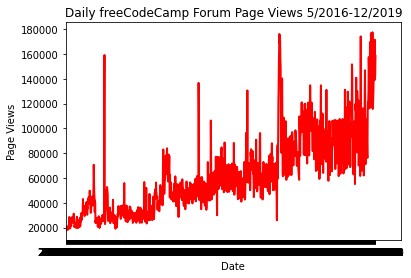

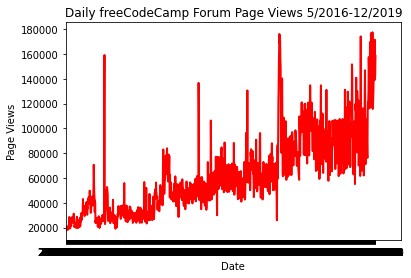

In [4]:
def draw_line_plot():
    # Draw line plot

    fig,ax = plt.subplots()
    x = df['date']
    y = df['value']
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.plot(x,y,linewidth=2.0,color="red")
    ax.set(xlim=(0,len(x)+100),xticks=x)
    
    #plt.show()
    
    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig
  
draw_line_plot()

## Bar Plot

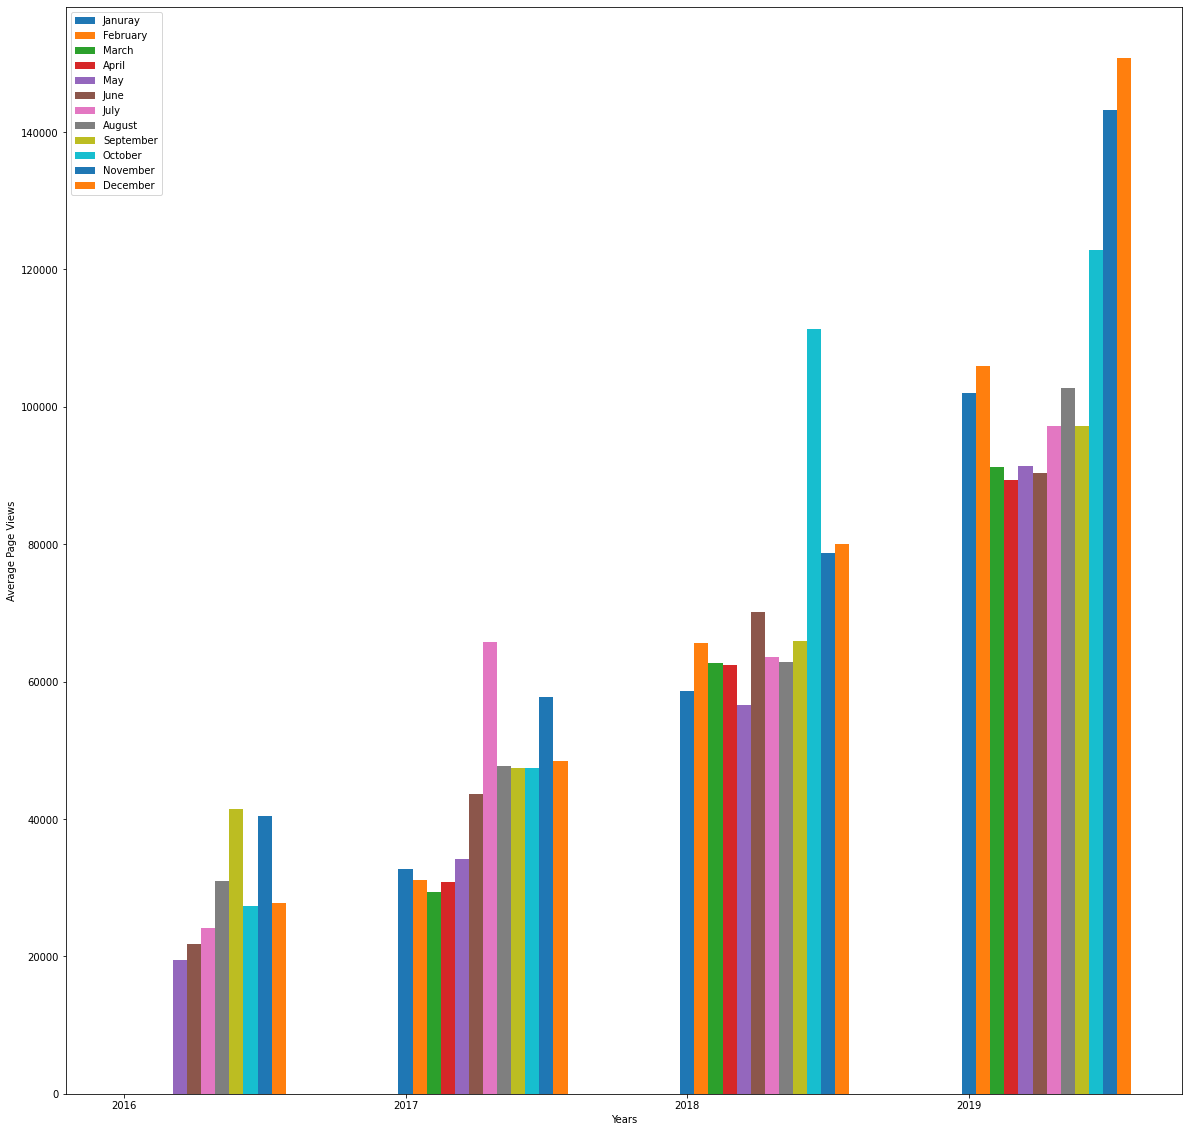

<Figure size 432x288 with 0 Axes>

In [5]:
years_map = {
    2016: 0,
    2017: 1,
    2018: 2,
    2019: 3
}


def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    # 2016-05-09
    df_bar = df.groupby(pd.PeriodIndex(df['date'], freq="M"))['value'].mean().reset_index()
    years = ['2016','2017','2018','2019']
    x_axis = np.arange(len(years))
    # Draw bar plot
    months = np.zeros((12,4))
    for index,row in df_bar.iterrows():
        x = row['date']
        i = (x.month - 1) % 12
        j = years_map.get(x.year)
        months[i][j] = row['value']
    width = 0.05
    
    plt.figure(figsize=(20,20))
    plt.bar(x_axis, months[0], 0.05, label="Januray")
    plt.bar(x_axis+width, months[1], 0.05, label="February")
    plt.bar(x_axis+width*2, months[2], 0.05, label="March")
    plt.bar(x_axis+width*3, months[3], 0.05, label="April")
    plt.bar(x_axis+width*4, months[4], 0.05, label="May")
    plt.bar(x_axis+width*5, months[5], 0.05, label="June")
    plt.bar(x_axis+width*6, months[6], 0.05, label="July")
    plt.bar(x_axis+width*7, months[7], 0.05, label="August")
    plt.bar(x_axis+width*8, months[8], 0.05, label="September")
    plt.bar(x_axis+width*9, months[9], 0.05, label="October")
    plt.bar(x_axis+width*10, months[10], 0.05, label="November")
    plt.bar(x_axis+width*11, months[11], 0.05, label="December")
    plt.xticks(x_axis,years)
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    #plt.title()
    plt.legend()
    plt.show()

    # Save image and return fig (don't change this part)
    plt.savefig('bar_plot.png')
    
draw_bar_plot()

## Box Plot

   index        date  value  year  month
0     10  2016-05-19  19736  2016      5
1     17  2016-05-26  18060  2016      5
2     18  2016-05-27  19997  2016      5
3     19  2016-05-28  19044  2016      5
4     20  2016-05-29  20325  2016      5
MONTHS ['May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec' 'Jan' 'Feb' 'Mar' 'Apr']


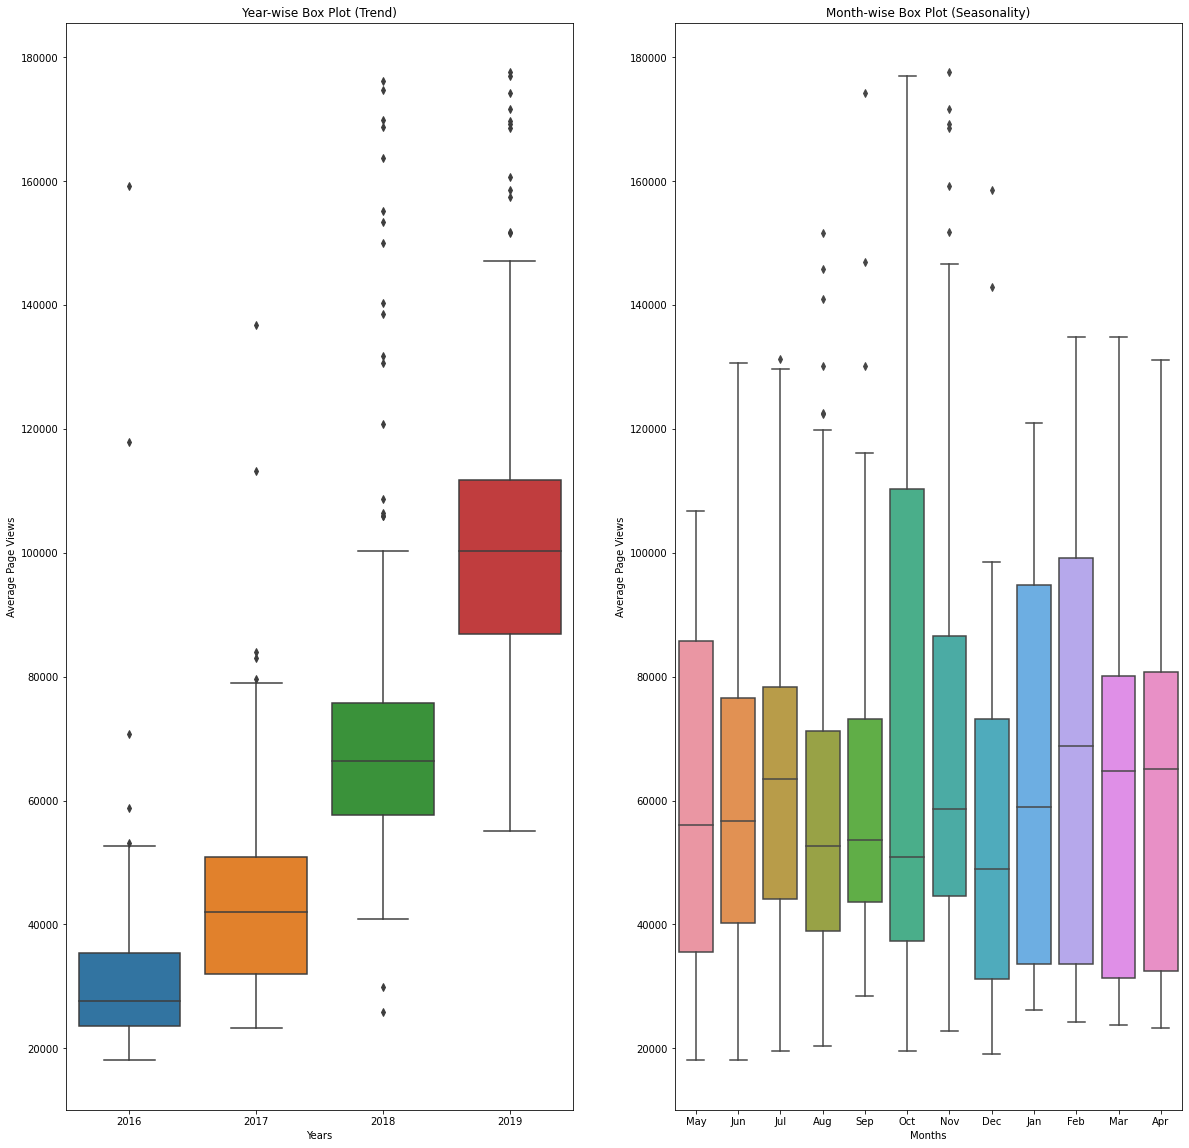

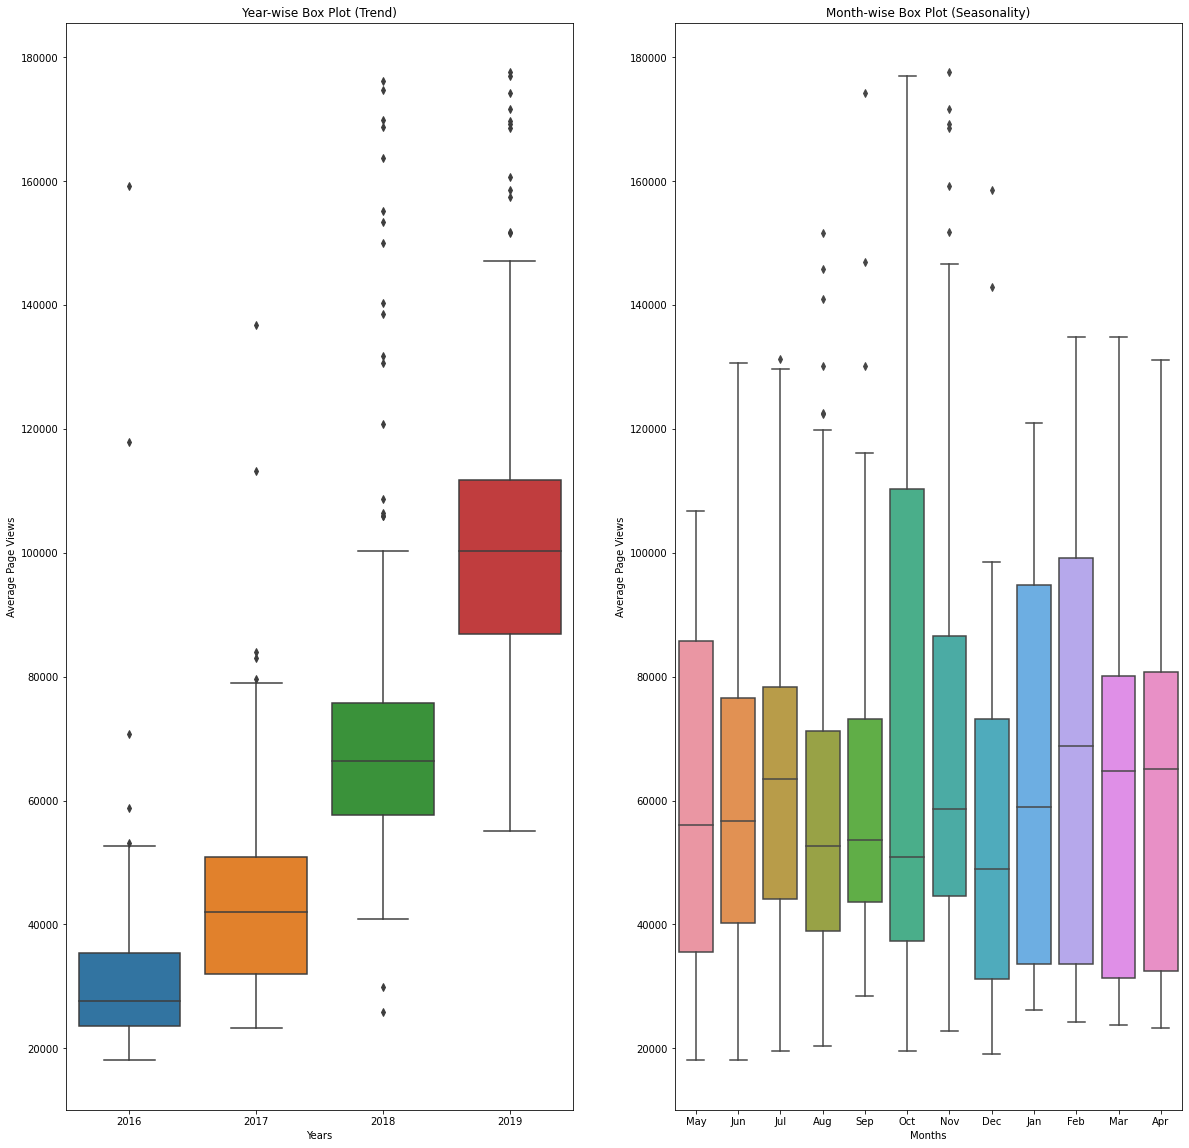

In [6]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    format = '%Y-%m-%d'
    df_box['year'] = [(datetime.strptime(d, format)).year for d in df_box.date]
    df_box['month'] = [(datetime.strptime(d, format)).month for d in df_box.date]

    print(df_box.head())
    # Draw box plots (using Seaborn)
    fig, axs = plt.subplots(ncols=2,figsize=(20,20))
    df_1 = df_box.copy()
    df_1.drop('month',axis=1)
    df_1.reset_index(inplace=True)
    sns.boxplot(data=df_1,x='year',y='value',ax=axs[0]).set(title='Year-wise Box Plot (Trend)',xlabel='Years', ylabel='Average Page Views')
    
    months = {
        1:'Jan',
		2:'Feb',
		3:'Mar',
		4:'Apr',
		5:'May',
		6:'Jun',
		7:'Jul',
		8:'Aug',
		9:'Sep',
		10:'Oct',
		11:'Nov',
		12:'Dec'		
    }
    df_2 = df_box.copy()
    df_2.drop('year',axis=1)
    df_2.set_index('month')
    df_2['month'] = [months.get(d) for d in df_2.month]
    print('MONTHS', df_2['month'].unique())
    df_2.reset_index(inplace=True)
    sns.boxplot(data=df_2,x='month',y='value',ax=axs[1]).set(title='Month-wise Box Plot (Seasonality)',xlabel='Months', ylabel='Average Page Views')
    
    plt.show()
    
    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig
  
draw_box_plot()